<a href="https://colab.research.google.com/github/vanithadv95/Final_Project/blob/main/project1_CHENNAI_HOUSE_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARY

#LOADING THE DATASET

In [ ]:
import pandas as pd #-----------------------------------pandas library
import numpy as np #------------------------------------numpy libray
import matplotlib.pyplot as plt#------------------------plotting library
import seaborn as sns #---------------------------------plotting library
from sklearn.preprocessing import OneHotEncoder #-------encoding library
from sklearn.impute import SimpleImputer  #-------imputing library 
from sklearn.preprocessing import StandardScaler  #-----scaling library
from sklearn.model_selection import train_test_split #--split the data library
from sklearn.linear_model import LinearRegression  #----model library 


In [ ]:
df=pd.read_csv("/content/train-chennai-sale.csv") 
df.head(5)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

#Columns Data Types:

In [ ]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# DataFrame Columns:

In [ ]:
len(df.columns)

22

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

#shape will return how many rows and how many columns

In [ ]:
df.shape

(7109, 22)

In [ ]:
data=df.iloc[:,1:]

In [ ]:
data.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


#AREA

In [ ]:
data['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [ ]:
data['AREA']=data['AREA'].str.lower()

In [ ]:
data.AREA.value_counts()

chrompet      1681
karapakkam    1363
kk nagar       996
velachery      979
anna nagar     783
adyar          773
t nagar        496
chrompt          9
chrmpet          6
chormpet         6
tnagar           5
karapakam        3
ana nagar        3
velchery         2
ann nagar        2
adyr             1
kknagar          1
Name: AREA, dtype: int64

#spelling correction:

In [ ]:
data["AREA"]=data["AREA"].replace({"chrompt":"chormpet","chrmpet":"chrompet","chormpet":"chrompet","kknagar":"kk nagar","adyr":"adyar","ann nagar":"anna nagar","velchery":"velachery","ana nagar":"anna nagar","karapakam":"karapakkam","tnagar":"t nagar"})

In [ ]:
data.AREA.value_counts()

chrompet      1693
karapakkam    1366
kk nagar       997
velachery      981
anna nagar     788
adyar          774
t nagar        501
chormpet         9
Name: AREA, dtype: int64

In [ ]:
data.AREA.unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 't nagar', 'chormpet'], dtype=object)

In [ ]:
data['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [ ]:
data['PARK_FACIL']=data.PARK_FACIL.replace({"Noo":'No'})

In [ ]:
data['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [ ]:
data['PARK_FACIL']=data.PARK_FACIL.str.lower()

In [ ]:
data.PARK_FACIL.unique()

array(['yes', 'no'], dtype=object)

#BUILD_TYPE:

In [ ]:
data['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
data['BUILDTYPE']=data['BUILDTYPE'].str.lower()

In [ ]:
data['BUILDTYPE'].value_counts()

house         2444
commercial    2325
others        2310
other           26
comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
data['BUILDTYPE']=data['BUILDTYPE'].replace({"other":"others","comercial":"commercial"})

In [ ]:
data.BUILDTYPE.unique()

array(['commercial', 'others', 'house'], dtype=object)

#UTILITY_AVAIL

In [ ]:
data['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].str.lower()

In [ ]:
data['UTILITY_AVAIL']=data['UTILITY_AVAIL'].replace({"all pub":"allpub","nosewr ":"nosewa"})

In [ ]:
data['UTILITY_AVAIL'].unique()

array(['allpub', 'elo', 'nosewa'], dtype=object)

#STREET

In [ ]:
data['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
data['STREET']=data['STREET'].str.lower()

In [ ]:
data['STREET']=data['STREET'].replace({"pavd":"paved",'noaccess':'no access'})

In [ ]:
data['STREET'].unique()

array(['paved', 'gravel', 'no access'], dtype=object)

#INT_SQFT

In [ ]:
data['INT_SQFT'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7104    False
7105    False
7106    False
7107    False
7108    False
Name: INT_SQFT, Length: 7109, dtype: bool

#CHECKING NULL VALUES

In [ ]:
data['INT_SQFT'].isnull().sum()

0

#DATE_SALE

In [ ]:
data['DATE_SALE']

0       04-05-2011
1       19-12-2006
2       04-02-2012
3       13-03-2010
4       05-10-2009
           ...    
7104    03-01-2011
7105    08-04-2004
7106    25-08-2006
7107    03-08-2009
7108    13-07-2005
Name: DATE_SALE, Length: 7109, dtype: object

#Normalize the sale date

In [ ]:
data['DATE_SALE']=pd.to_datetime(data["DATE_SALE"],format='%d-%m-%Y') 
data['DATE_BUILD']=pd.to_datetime(data['DATE_BUILD'],format='%d-%m-%Y')

In [ ]:
data['DATE_SALE']

0      2011-05-04
1      2006-12-19
2      2012-02-04
3      2010-03-13
4      2009-10-05
          ...    
7104   2011-01-03
7105   2004-04-08
7106   2006-08-25
7107   2009-08-03
7108   2005-07-13
Name: DATE_SALE, Length: 7109, dtype: datetime64[ns]

In [ ]:
data['DATE_BUILD']

0      1967-05-15
1      1995-12-22
2      1992-02-09
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-04-11
7106   1978-09-01
7107   1977-08-11
7108   1961-07-24
Name: DATE_BUILD, Length: 7109, dtype: datetime64[ns]

#DIST_MAINROAD

In [ ]:
data['DIST_MAINROAD']

0       131
1        26
2        70
3        14
4        84
       ... 
7104     51
7105     52
7106    152
7107     40
7108    156
Name: DIST_MAINROAD, Length: 7109, dtype: int64

In [ ]:
data['DIST_MAINROAD'].isnull().sum()

0

#N_Bedroom

In [ ]:
data['N_BEDROOM'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [ ]:
from sklearn.impute import SimpleImputer 
import numpy as np


In [ ]:
SI=SimpleImputer(strategy='most_frequent',missing_values=np.nan)

In [ ]:
data[['N_BEDROOM']]

,N_BEDROOM
0,1.0
1,2.0
2,1.0
3,3.0
4,1.0
...,...
7104,1.0
7105,3.0
7106,2.0
7107,1.0


In [ ]:
data['N_BEDROOM']=SI.fit_transform(data[['N_BEDROOM']])

In [ ]:
data['N_BEDROOM'].unique()


array([1., 2., 3., 4.])

In [ ]:
data['N_BEDROOM'] = data['N_BEDROOM'].astype(int)

In [ ]:
data['N_BEDROOM'].dtype

dtype('int64')

#N_BATHROOM

In [ ]:
data['N_BATHROOM'].unique()

array([ 1.,  2., nan])

In [ ]:
data['N_BATHROOM'].isnull().sum()

5

In [ ]:
data['N_BATHROOM']=SI.fit_transform(data[['N_BATHROOM']])

In [ ]:
data['N_BATHROOM'].isnull().sum()

0

In [ ]:
data['N_BATHROOM'] = data['N_BATHROOM'].astype(int)

In [ ]:
data.N_BATHROOM.dtype

dtype('int64')

#QS_OVERALL

In [ ]:
data['QS_OVERALL'].isnull().sum()

48

In [ ]:
SI=SimpleImputer(strategy='mean')

In [ ]:
data['QS_OVERALL']=SI.fit_transform(data[['QS_OVERALL']])

In [ ]:
data['QS_OVERALL'].isnull().sum()

0

In [ ]:
data['QS_OVERALL'].dtype

dtype('float64')

In [ ]:
data['QS_OVERALL']

0       4.330
1       3.765
2       3.090
3       4.010
4       3.290
        ...  
7104    2.520
7105    3.920
7106    3.840
7107    4.160
7108    3.640
Name: QS_OVERALL, Length: 7109, dtype: float64

#SALE_COND

In [ ]:
data['SALE_COND']

0          AbNormal
1          AbNormal
2          AbNormal
3            Family
4          AbNormal
           ...     
7104        AdjLand
7105         Family
7106    Normal Sale
7107        Partial
7108        Partial
Name: SALE_COND, Length: 7109, dtype: object

In [ ]:
data['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
data['SALE_COND']=data['SALE_COND'].str.lower()

In [ ]:
data['SALE_COND'].unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale',
       'ab normal', 'partiall', 'adj land'], dtype=object)

In [ ]:
data['SALE_COND'].value_counts()

adjland        1433
partial        1429
normal sale    1423
abnormal       1406
family         1403
adj land          6
ab normal         5
partiall          4
Name: SALE_COND, dtype: int64

In [ ]:
data["SALE_COND"]=data["SALE_COND"].replace({"adj land":"adjland","ab normal":"abnormal","partiall":"partial"})

In [ ]:
data["SALE_COND"].value_counts()

adjland        1439
partial        1433
normal sale    1423
abnormal       1411
family         1403
Name: SALE_COND, dtype: int64

In [ ]:
data=data.drop_duplicates()

In [ ]:
del data['REG_FEE'] 
del data['COMMIS']  


In [ ]:
data

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,karapakkam,1004,2011-05-04,131,1,1,3,abnormal,yes,1967-05-15,commercial,allpub,paved,A,4.0,3.9,4.9,4.330,7600000
1,anna nagar,1986,2006-12-19,26,2,1,5,abnormal,no,1995-12-22,commercial,allpub,gravel,RH,4.9,4.2,2.5,3.765,21717770
2,adyar,909,2012-02-04,70,1,1,3,abnormal,yes,1992-02-09,commercial,elo,gravel,RL,4.1,3.8,2.2,3.090,13159200
3,velachery,1855,2010-03-13,14,3,2,5,family,no,1988-03-18,others,nosewa,paved,I,4.7,3.9,3.6,4.010,9630290
4,karapakkam,1226,2009-10-05,84,1,1,3,abnormal,yes,1979-10-13,others,allpub,gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,karapakkam,598,2011-01-03,51,1,1,2,adjland,no,1962-01-15,others,elo,no access,RM,3.0,2.2,2.4,2.520,5353000
7105,velachery,1897,2004-04-08,52,3,2,5,family,yes,1995-04-11,others,nosewa,no access,RH,3.6,4.5,3.3,3.920,10818480
7106,velachery,1614,2006-08-25,152,2,1,4,normal sale,no,1978-09-01,house,nosewa,gravel,I,4.3,4.2,2.9,3.840,8351410
7107,karapakkam,787,2009-08-03,40,1,1,2,partial,yes,1977-08-11,commercial,elo,paved,RL,4.6,3.8,4.1,4.160,8507000


# Age of Building

In [ ]:
data['AGE']=data['DATE_SALE'].dt.year - data['DATE_BUILD'].dt.year

In [ ]:
data['AGE']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE, Length: 7109, dtype: int64

In [ ]:
data


,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,karapakkam,1004,2011-05-04,131,1,1,3,abnormal,yes,1967-05-15,commercial,allpub,paved,A,4.0,3.9,4.9,4.330,7600000,44
1,anna nagar,1986,2006-12-19,26,2,1,5,abnormal,no,1995-12-22,commercial,allpub,gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,adyar,909,2012-02-04,70,1,1,3,abnormal,yes,1992-02-09,commercial,elo,gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,velachery,1855,2010-03-13,14,3,2,5,family,no,1988-03-18,others,nosewa,paved,I,4.7,3.9,3.6,4.010,9630290,22
4,karapakkam,1226,2009-10-05,84,1,1,3,abnormal,yes,1979-10-13,others,allpub,gravel,C,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,karapakkam,598,2011-01-03,51,1,1,2,adjland,no,1962-01-15,others,elo,no access,RM,3.0,2.2,2.4,2.520,5353000,49
7105,velachery,1897,2004-04-08,52,3,2,5,family,yes,1995-04-11,others,nosewa,no access,RH,3.6,4.5,3.3,3.920,10818480,9
7106,velachery,1614,2006-08-25,152,2,1,4,normal sale,no,1978-09-01,house,nosewa,gravel,I,4.3,4.2,2.9,3.840,8351410,28
7107,karapakkam,787,2009-08-03,40,1,1,2,partial,yes,1977-08-11,commercial,elo,paved,RL,4.6,3.8,4.1,4.160,8507000,32




---



#EDA

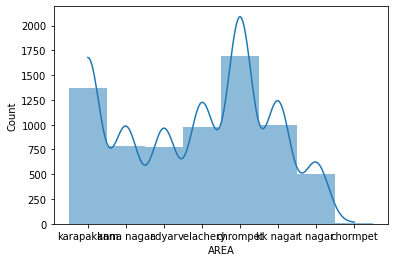

In [ ]:
sns.histplot(data.AREA, linewidth=0,kde=True)

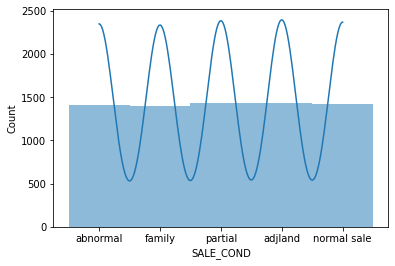

In [ ]:
sns.histplot(data.SALE_COND, linewidth=0,kde=True)

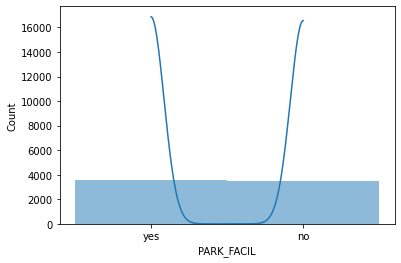

In [ ]:
sns.histplot(data.PARK_FACIL, linewidth=0,kde=True)

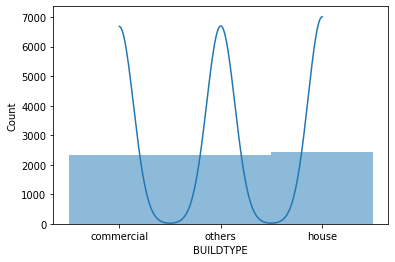

In [ ]:
sns.histplot(data.BUILDTYPE, linewidth=0,kde=True)

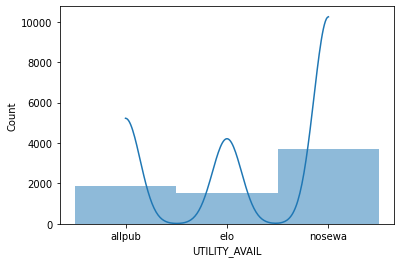

In [ ]:
sns.histplot(data.UTILITY_AVAIL, linewidth=0,kde=True)

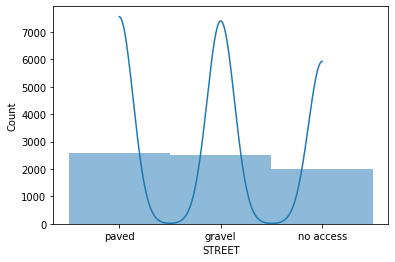

In [ ]:
sns.histplot(data.STREET, linewidth=0,kde=True)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


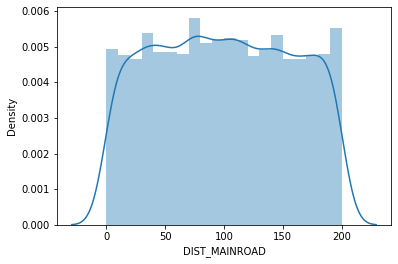

In [ ]:
sns.distplot(data.DIST_MAINROAD)




/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


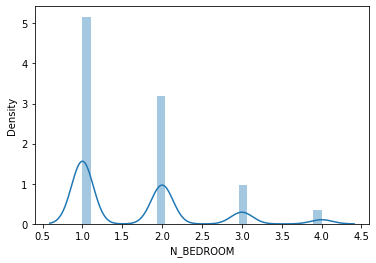

In [ ]:
sns.distplot(data.N_BEDROOM)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


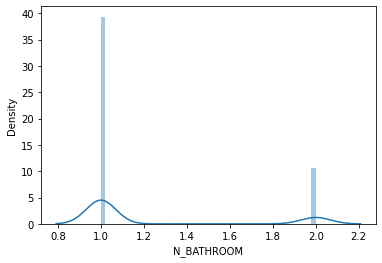

In [ ]:
sns.distplot(data.N_BATHROOM)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


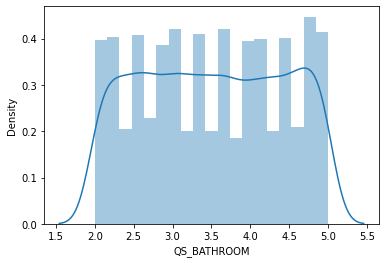

In [ ]:
sns.distplot(data.QS_BATHROOM)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


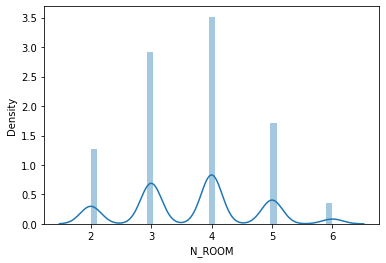

In [ ]:
sns.distplot(data.N_ROOM)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


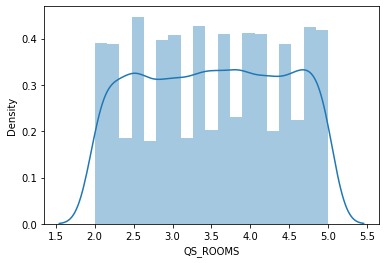

In [ ]:
sns.distplot(data.QS_ROOMS)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


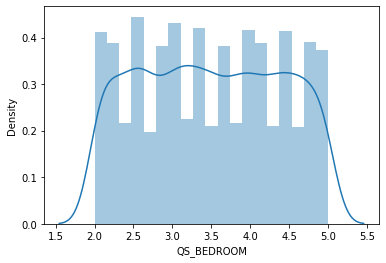

In [ ]:
sns.distplot(data.QS_BEDROOM)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


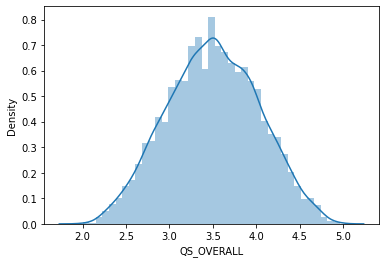

In [ ]:
sns.distplot(data.QS_OVERALL)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


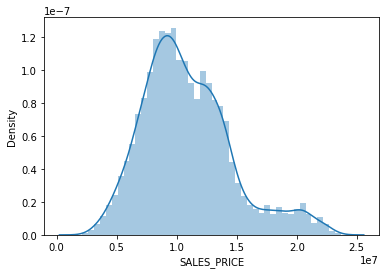

In [ ]:
sns.distplot(data.SALES_PRICE)

# DISTRIBUTION OF FEATURE FOR BAR PLOT

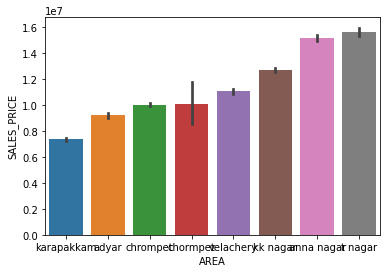

In [ ]:
sns.barplot(x=data.AREA,y=data.SALES_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])


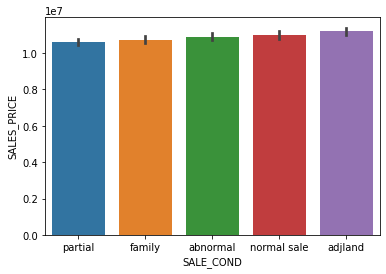

In [ ]:
sns.barplot(x=data.SALE_COND,y=data.SALES_PRICE,order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])


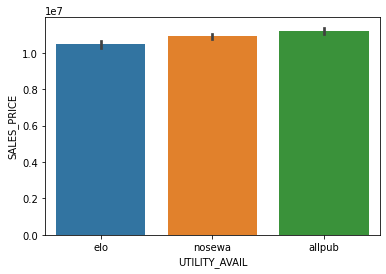

In [ ]:
sns.barplot(x=data.UTILITY_AVAIL,y=data.SALES_PRICE,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])


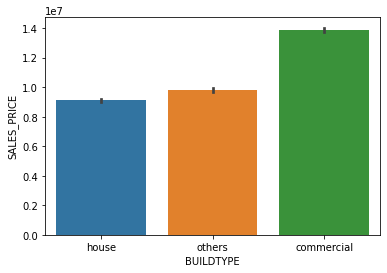

In [ ]:
sns.barplot(x=data.BUILDTYPE,y=data.SALES_PRICE,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])


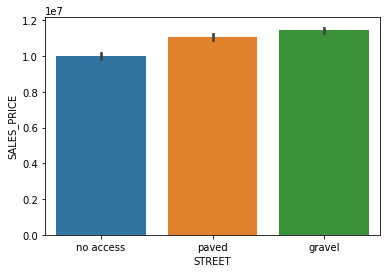

In [ ]:
sns.barplot(x=data.STREET,y=data.SALES_PRICE,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])


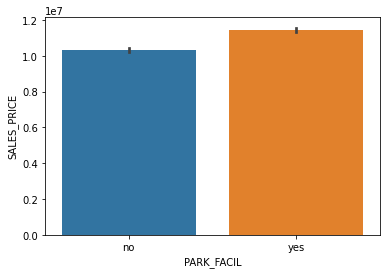

In [ ]:
sns.barplot(x=data.PARK_FACIL,y=data.SALES_PRICE,order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

#ENCODING

In [ ]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,karapakkam,1004,2011-05-04,131,1,1,3,abnormal,yes,1967-05-15,commercial,allpub,paved,A,4.0,3.9,4.9,4.330,7600000,44
1,anna nagar,1986,2006-12-19,26,2,1,5,abnormal,no,1995-12-22,commercial,allpub,gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,adyar,909,2012-02-04,70,1,1,3,abnormal,yes,1992-02-09,commercial,elo,gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,velachery,1855,2010-03-13,14,3,2,5,family,no,1988-03-18,others,nosewa,paved,I,4.7,3.9,3.6,4.010,9630290,22
4,karapakkam,1226,2009-10-05,84,1,1,3,abnormal,yes,1979-10-13,others,allpub,gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [ ]:
from sklearn.preprocessing import OneHotEncoder 
OHE=OneHotEncoder(sparse=False)


In [ ]:
data['AREA'].value_counts()

chrompet      1693
karapakkam    1366
kk nagar       997
velachery      981
anna nagar     788
adyar          774
t nagar        501
chormpet         9
Name: AREA, dtype: int64

In [ ]:
area=OHE.fit_transform(data[['AREA']])

In [ ]:
df1=pd.DataFrame(data=area,columns=['AREA1','AREA2','AREA3','AREA4','AREA5','AREA6','AREA7','AREA8'])

In [ ]:
df1

,AREA1,AREA2,AREA3,AREA4,AREA5,AREA6,AREA7,AREA8
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
7104,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7107,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
sale_cond=OHE.fit_transform(data[['SALE_COND']])

In [ ]:
df8=pd.DataFrame(data=sale_cond,columns=['SALE_COND1','SALE_COND2','SALE_COND3','SALE_COND4','SALE_COND5'])

In [ ]:
park_facil=OHE.fit_transform(data[['PARK_FACIL']])

In [ ]:
df9=pd.DataFrame(data=park_facil,columns=['PARK_FACIL1','PARK_FACIL2'])

In [ ]:
utilityavail=OHE.fit_transform(data[['UTILITY_AVAIL']])

In [ ]:
utilityavail

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
df11=pd.DataFrame(data=utilityavail,columns=['UTILITY_AVAIL1','UTILITY_AVAIL2','UTILITY_AVAIL3'])

In [ ]:
street=OHE.fit_transform(data[['STREET']])

In [ ]:
street

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [ ]:
df12=pd.DataFrame(data=street,columns=['STREET1','STREET2','STREET3'])

In [ ]:
mzzone=OHE.fit_transform(data[['MZZONE']])

In [ ]:
mzzone

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [ ]:
df13=pd.DataFrame(data=mzzone,columns=['MZZONE1','MZZONE2','MZZONE3','MZZONE4','MZZONE5','MZZONE6'])

In [ ]:
df_final=pd.concat([df1,data.iloc[:,1:7],df8,df9,data.iloc[:,10:11],df11,df12,df13,data.iloc[:,14:]],axis=1)

In [ ]:
data = pd.get_dummies(df_final,columns=['BUILDTYPE'])

In [ ]:
data

,AREA1,AREA2,AREA3,AREA4,AREA5,AREA6,AREA7,AREA8,INT_SQFT,DATE_SALE,...,MZZONE6,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,BUILDTYPE_commercial,BUILDTYPE_house,BUILDTYPE_others
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1004,2011-05-04,...,0.0,4.0,3.9,4.9,4.330,7600000,44,1,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1986,2006-12-19,...,0.0,4.9,4.2,2.5,3.765,21717770,11,1,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,909,2012-02-04,...,0.0,4.1,3.8,2.2,3.090,13159200,20,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1855,2010-03-13,...,0.0,4.7,3.9,3.6,4.010,9630290,22,0,0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1226,2009-10-05,...,0.0,3.0,2.5,4.1,3.290,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,598,2011-01-03,...,1.0,3.0,2.2,2.4,2.520,5353000,49,0,0,1
7105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1897,2004-04-08,...,0.0,3.6,4.5,3.3,3.920,10818480,9,0,0,1
7106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1614,2006-08-25,...,0.0,4.3,4.2,2.9,3.840,8351410,28,0,1,0
7107,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,787,2009-08-03,...,0.0,4.6,3.8,4.1,4.160,8507000,32,1,0,0


#DROPPING COLUMNS

In [ ]:
data.drop(['DATE_SALE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'], axis=1,inplace=True)

In [ ]:
data.head()

,AREA1,AREA2,AREA3,AREA4,AREA5,AREA6,AREA7,AREA8,INT_SQFT,DIST_MAINROAD,...,MZZONE2,MZZONE3,MZZONE4,MZZONE5,MZZONE6,SALES_PRICE,AGE,BUILDTYPE_commercial,BUILDTYPE_house,BUILDTYPE_others
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1004,131,...,0.0,0.0,0.0,0.0,0.0,7600000,44,1,0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1986,26,...,0.0,0.0,1.0,0.0,0.0,21717770,11,1,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,909,70,...,0.0,0.0,0.0,1.0,0.0,13159200,20,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1855,14,...,0.0,1.0,0.0,0.0,0.0,9630290,22,0,0,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1226,84,...,1.0,0.0,0.0,0.0,0.0,7406250,30,0,0,1


In [ ]:
SALES_PRICE=data['SALES_PRICE']

In [ ]:
SALES_PRICE

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7109, dtype: int64

In [ ]:
data.drop(['SALES_PRICE'],axis=1,inplace=True)

In [ ]:
data_sales=pd.DataFrame(data=SALES_PRICE,columns=['SALES_PRICE'])

In [ ]:
data_sales.head()

,SALES_PRICE
0,7600000
1,21717770
2,13159200
3,9630290
4,7406250


In [ ]:
df_final=pd.concat([data,data_sales],axis=1)

In [ ]:
df_final.columns

Index(['AREA1', 'AREA2', 'AREA3', 'AREA4', 'AREA5', 'AREA6', 'AREA7', 'AREA8',
       'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'SALE_COND1', 'SALE_COND2', 'SALE_COND3', 'SALE_COND4', 'SALE_COND5',
       'PARK_FACIL1', 'PARK_FACIL2', 'UTILITY_AVAIL1', 'UTILITY_AVAIL2',
       'UTILITY_AVAIL3', 'STREET1', 'STREET2', 'STREET3', 'MZZONE1', 'MZZONE2',
       'MZZONE3', 'MZZONE4', 'MZZONE5', 'MZZONE6', 'AGE',
       'BUILDTYPE_commercial', 'BUILDTYPE_house', 'BUILDTYPE_others',
       'SALES_PRICE'],
      dtype='object')

#SPLIT THE DATA:

In [ ]:
X=df_final.iloc[:,:-1].values 
y=df_final['SALES_PRICE'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [ ]:
X_train.shape

(5687, 36)

In [ ]:
X_test.shape

(1422, 36)

In [ ]:
y_train.shape

(5687,)

In [ ]:
y_test.shape

(1422,)

#SCALING THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()

In [ ]:
X_train=SS.fit_transform(X_train)
X_test=SS.transform(X_test) 


#MODELING THE DATA

In [ ]:
from sklearn import metrics # evaluation metrics
lr = LinearRegression()     #object creation
lr.fit(X_train, y_train)    #fit the model
y_pred = lr.predict(X_test) #predict the values
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))  #getting r2_score

R2- SCORE: 0.9561716564096003


In [ ]:
lr.score(X_test,y_test)

0.9561716564096003

In [ ]:
print("intercept: ",lr.intercept_)
print("coefficient: ",lr.coef_)

intercept:  10910479.0282169
coefficient:  [ 2.63711162e+18  2.65801664e+18  2.53126683e+17  3.63660108e+18
  3.35339102e+18  2.97249943e+18  2.22379877e+18  2.97404758e+18
  1.77457306e+06  1.27058505e+04  1.99151919e+05 -1.61339285e+05
  1.75710345e+05  4.05830762e+18  4.04888323e+18  4.04347066e+18
  4.09540694e+18  4.06098922e+18 -3.84521507e+18 -3.84521507e+18
 -8.45269095e+17 -7.83617503e+17 -9.53118999e+17  5.57272693e+18
  5.26154620e+18  5.58555661e+18 -6.50932885e+18 -6.45520435e+18
 -6.35198278e+18 -1.05469108e+19 -1.06543010e+19 -1.06472832e+19
 -2.48012327e+05  9.44082615e+17  9.55609395e+17  9.43823117e+17]


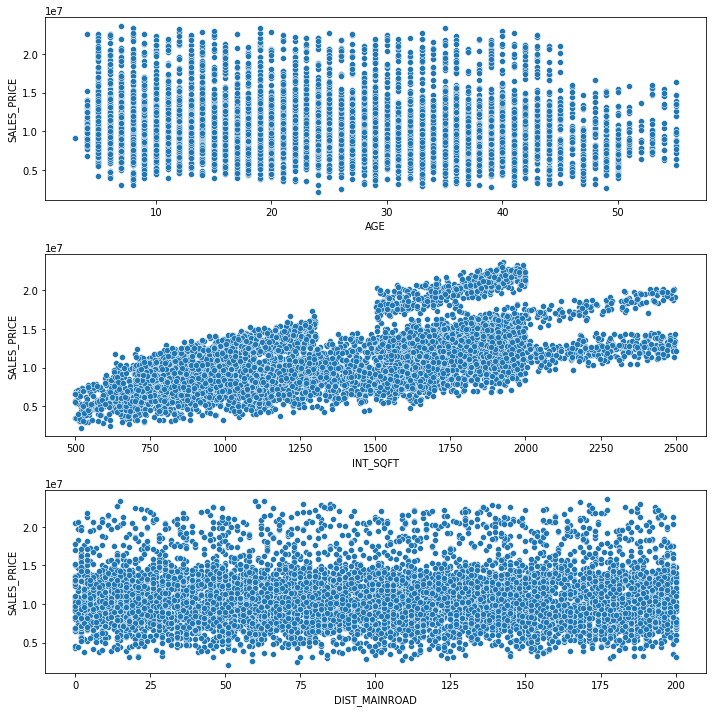

In [ ]:
fig,axs=plt.subplots(3,figsize=(10,10))
plt1=sns.scatterplot(x='AGE',y="SALES_PRICE",data=df_final,ax=axs[0])
plt2=sns.scatterplot(x='INT_SQFT',y="SALES_PRICE",data=df_final,ax=axs[1])
plt3=sns.scatterplot(x='DIST_MAINROAD',y="SALES_PRICE",data=df_final,ax=axs[2]) 
plt.tight_layout()

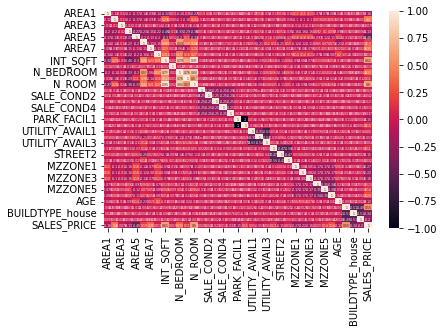

In [ ]:
sns.heatmap(df_final.corr(), annot=True,annot_kws={'size': 3}) 